In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import matrix_completion

In [2]:
df=pd.read_csv("soil_profiles.csv")

In [3]:
matrix_yield = np.loadtxt("matrix_yield.txt")
mask = np.loadtxt("mask.txt")


<AxesSubplot:>

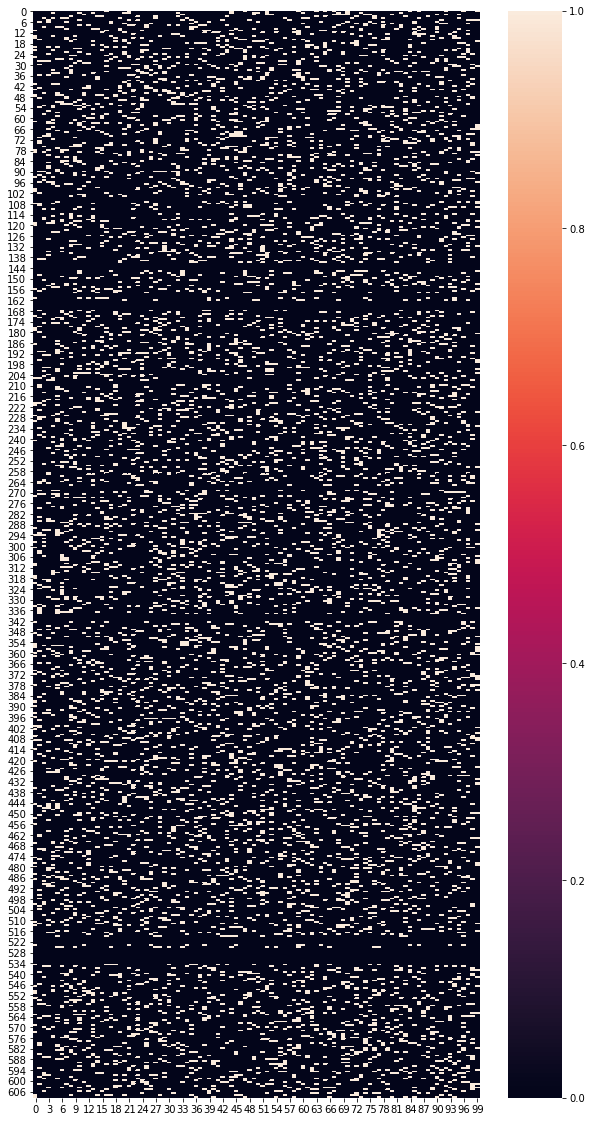

In [4]:
plt.figure(figsize=(10, 20))
sns.heatmap(mask)

<AxesSubplot:>

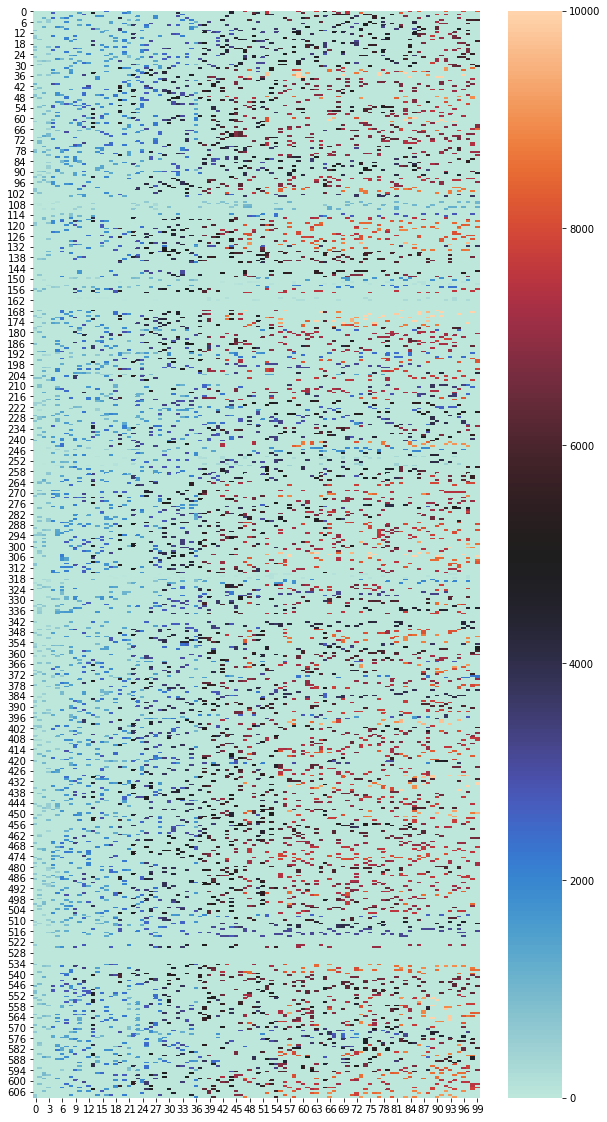

In [5]:
plt.figure(figsize=(10, 20))
sns.heatmap(matrix_yield,center=5000,vmax=10000)

In [6]:
with open("vector_yields.json", "r") as fil:
    vector_yields=json.load( fil)

In [7]:
# We use the matrix completion library, pmf_solve
# uses probabilistic matrix factorization with alternating least squares

Text(0.5, 1.0, 'Yield weight')

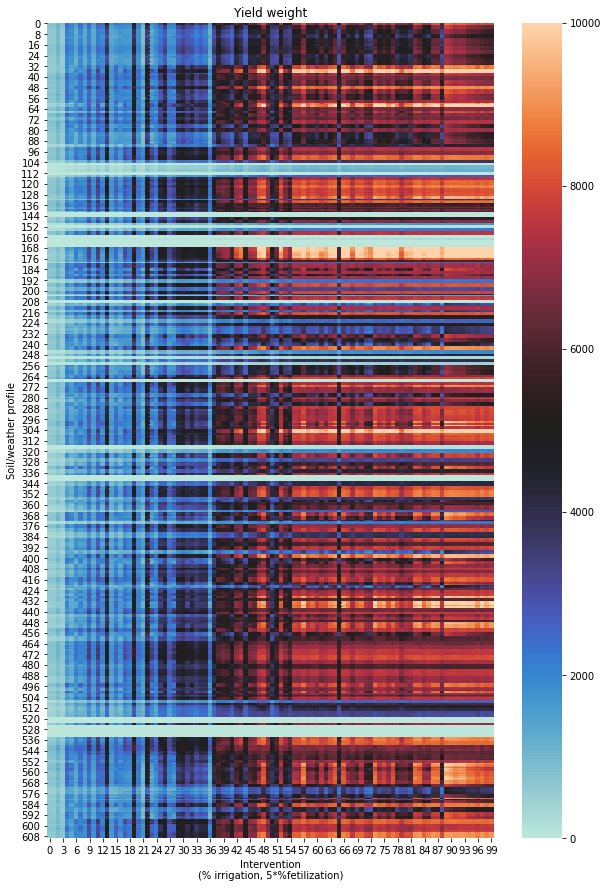

In [8]:
matrix_hat = matrix_completion.pmf_solve(matrix_yield, mask, k=4, mu=1000)

plt.figure(figsize=(10, 15))
sns.heatmap(matrix_hat,center=5000,vmax=10000)
plt.ylabel("Soil/weather profile")
plt.yticks()
plt.xlabel("Intervention\n(% irrigation, 5*%fetilization)")
plt.title("Yield weight")

## Tuning regularization

Text(0.5, 1.0, 'Yield weight')

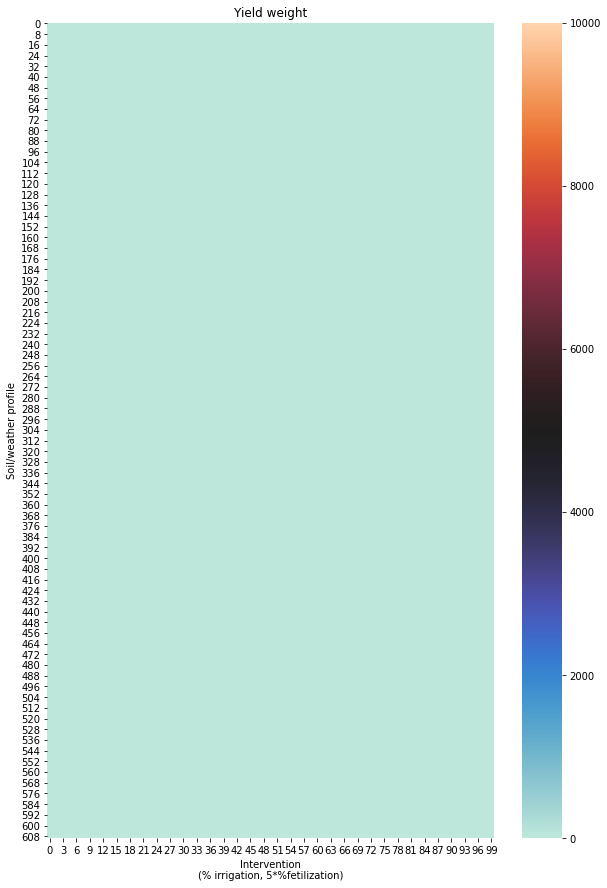

In [9]:
matrix_hat = matrix_completion.pmf_solve(matrix_yield, mask, k=4, mu=10**10)

plt.figure(figsize=(10, 15))
sns.heatmap(matrix_hat,center=5000,vmax=10000)
plt.ylabel("Soil/weather profile")
plt.yticks()
plt.xlabel("Intervention\n(% irrigation, 5*%fetilization)")
plt.title("Yield weight")

Text(0.5, 1.0, 'Yield weight')

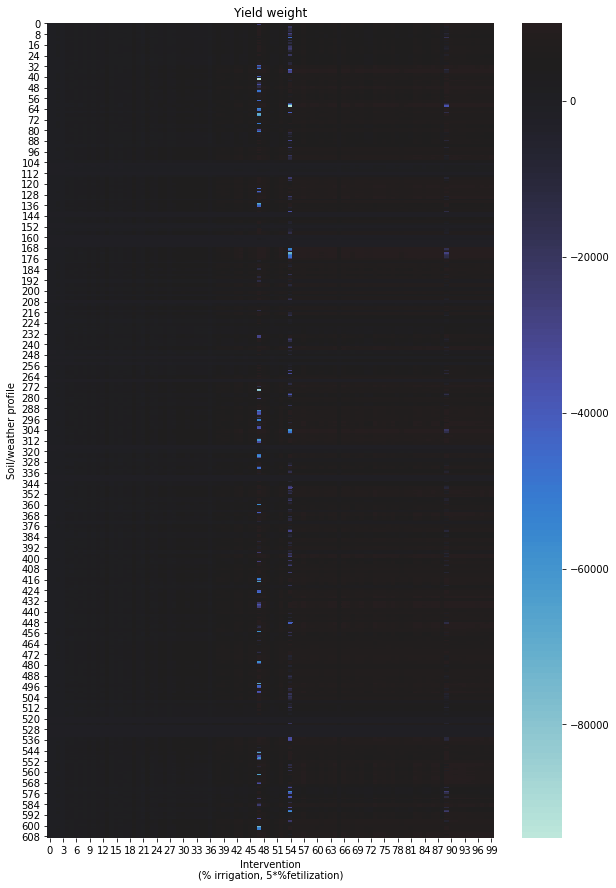

In [10]:
matrix_hat = matrix_completion.pmf_solve(matrix_yield, mask, k=4, mu=0.00001)

plt.figure(figsize=(10, 15))
sns.heatmap(matrix_hat,center=5000,vmax=10000)
plt.ylabel("Soil/weather profile")
plt.yticks()
plt.xlabel("Intervention\n(% irrigation, 5*%fetilization)")
plt.title("Yield weight")

## Validate performance

1


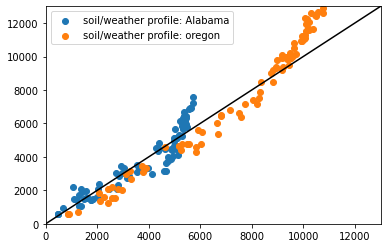

2


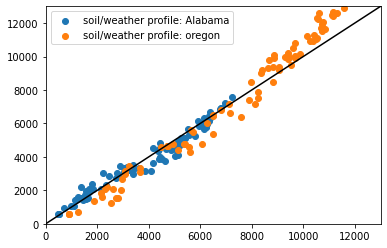

3


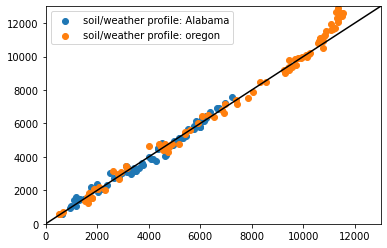

4


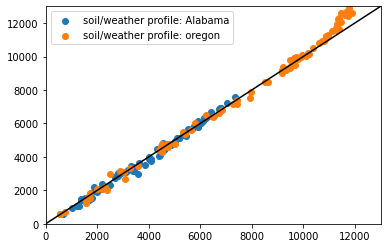

5


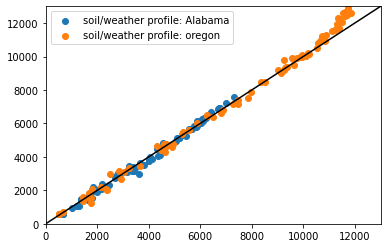

6


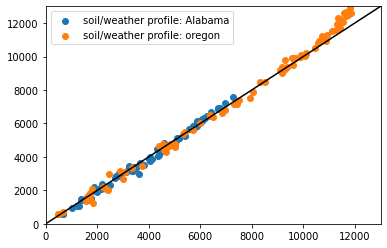

7


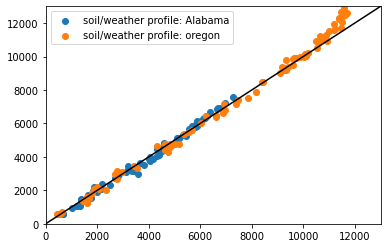

8


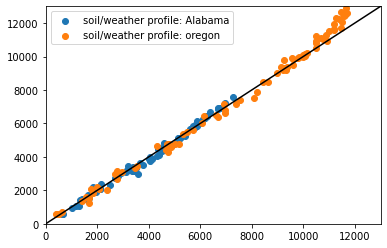

9


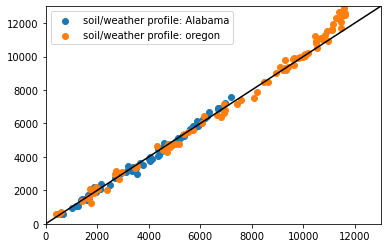

10


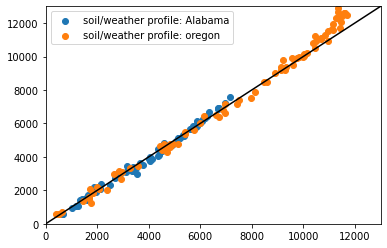

In [11]:
ers=[]
for fac in [1, 2, 3,4, 5, 6, 7, 8, 9, 10]:
    #mimask=np.array(mimask)
    print(fac)
    matrix_hat = matrix_completion.pmf_solve(matrix_yield, mask, k=fac, mu=1000)
    labels={35:"oregon", 8:"Alabama"}
    toterror=0
    for rowindex in [8, 35]:
        gindex=[]
        i=0
        for k in mask[rowindex]:
            if k==0:
                gindex.append(i)
            i+=1
        plt.scatter(matrix_hat[rowindex][gindex], np.array(vector_yields[str(rowindex)])[gindex], label="soil/weather profile: "+str(labels[rowindex]))
        for a, b in zip(matrix_hat[rowindex][gindex], np.array(vector_yields[str(rowindex)])[gindex]):
            toterror+=(a-b)**2
    plt.plot([0,15000],[0, 15000], color="black")
    plt.ylim([0, 13000])
    plt.xlim([0, 13000])
    plt.legend()
    plt.show()
    ers.append(np.mean(toterror))
    

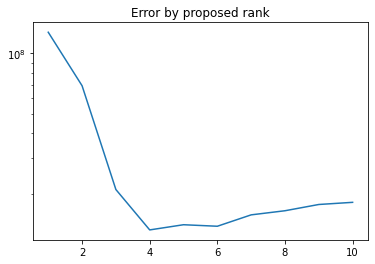

In [16]:
plt.plot(range(1, 11), ers)
plt.title("Error by proposed rank")
plt.yscale("log")
plt.show()

In [12]:
import plotly.graph_objects as go


In [13]:

df["max_yield"]=list(np.max(matrix_hat, axis=1))

limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()
scat=go.Scattergeo(
    locationmode = 'USA-states',
    lon = df['lat'],
    lat = df["long"],
    marker = dict(
        color = df["max_yield"],
        line_color='rgb(40,40,40)',
        line_width=0.5,
        colorbar = dict(
                title = 'Max yield')

    ))
fig.add_trace(scat)
#plt.colorbar(scat)
fig.update_layout(
        title_text = 'Max yield per soil',
        showlegend = False,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()